In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


import streamlit as st
import joblib

# Task

## 1. Data Exploration:
    a. Load the dataset and perform exploratory data analysis (EDA).
    b. Examine the features, their types, and summary statistics.
    c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
    Analyze any patterns or correlations observed in the data.


#### Training dataset

In [2]:
df_train=pd.read_csv(r"F:\Drive\ExcelR\Assignments\Logistic Regression\Logistic Regression\Titanic_train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Test dataset

In [3]:
# testing dataset
df_test=pd.read_csv(r"F:\Drive\ExcelR\Assignments\Logistic Regression\Logistic Regression\Titanic_test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Train summary

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


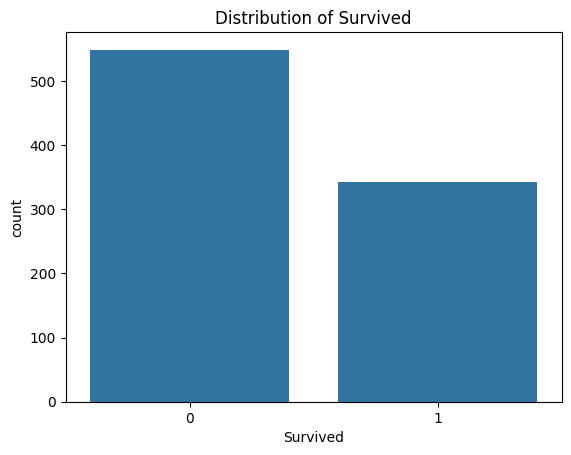

In [6]:
# Distribution of the target variable
sns.countplot(x='Survived', data=df_train)
plt.title('Distribution of Survived')
plt.show()

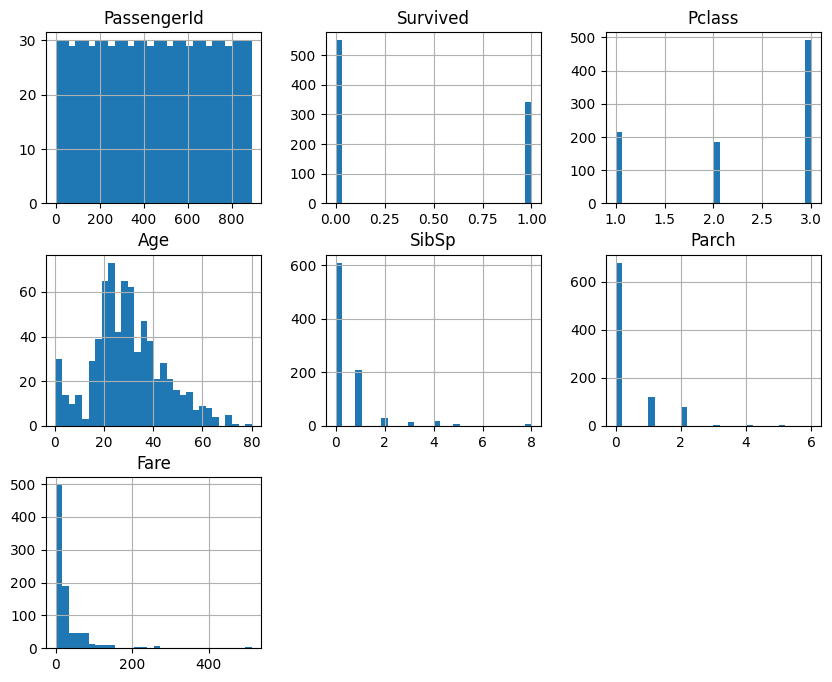

In [7]:
# Histograms of numerical features
df_train.hist(bins=30, figsize=(10, 8))
plt.show()


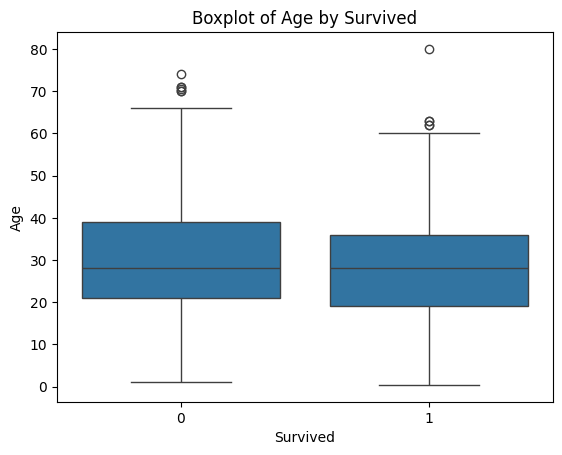

In [8]:
# 3. Box plots of numerical features 
sns.boxplot(x='Survived', y='Age', data=df_train)
plt.title('Boxplot of Age by Survived')
plt.show()

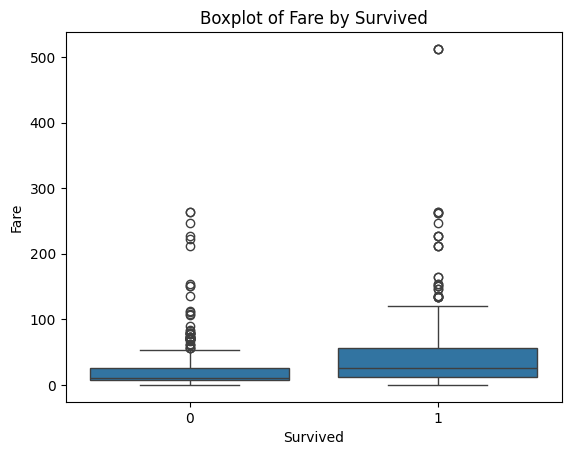

In [9]:
sns.boxplot(x='Survived', y='Fare', data=df_train)
plt.title('Boxplot of Fare by Survived')
plt.show()

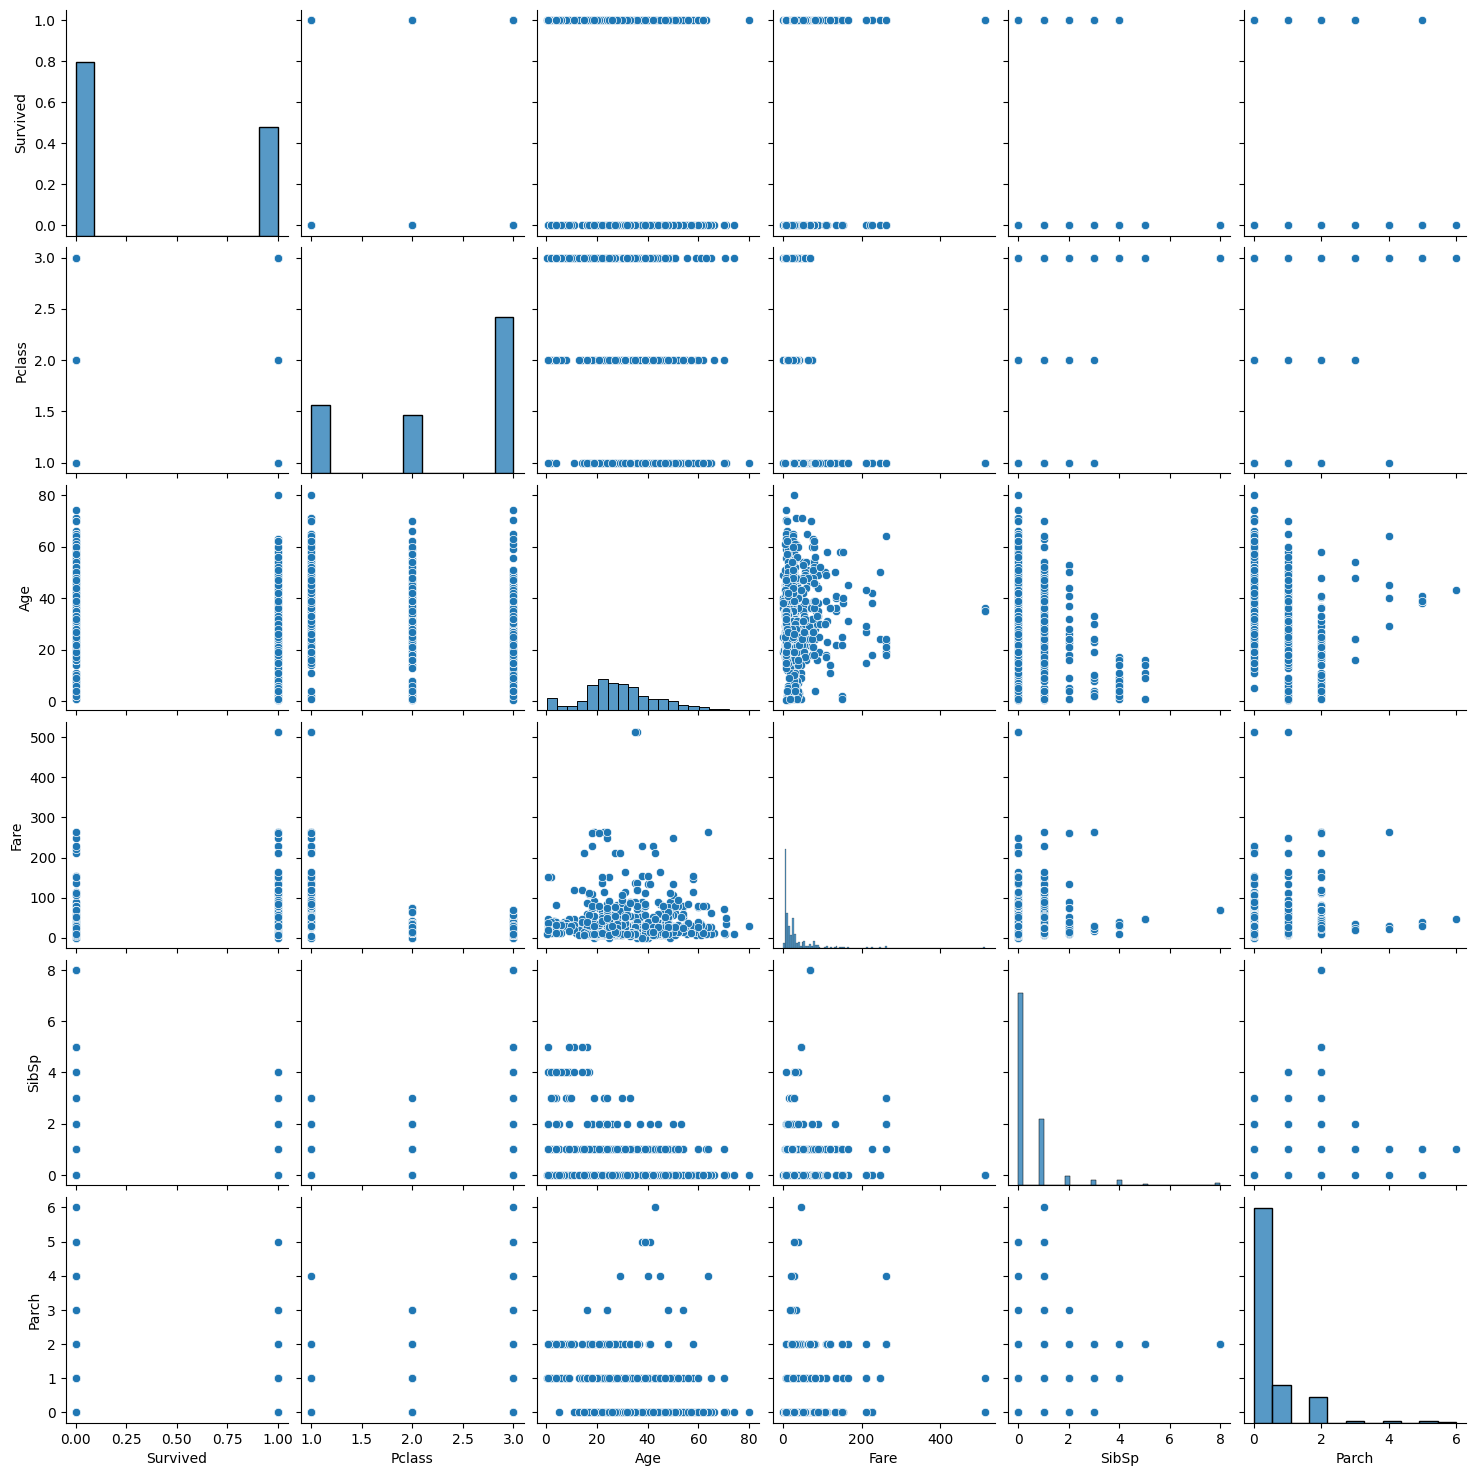

In [10]:
# Pair plot to visualize relationships
sns.pairplot(df_train[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']])
plt.show()

### test Summary

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [12]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 2. Data Preprocessing:
    a. Handle missing values (e.g., imputation).
    b. Encode categorical variables.


In [13]:
# Checking for missing values
print(df_train.isnull().sum())
print()
print(df_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [14]:
# Drop 'Cabin' due to too many missing values
df_train.drop(['Cabin'], axis=1, inplace=True)
df_test.drop(['Cabin'], axis=1, inplace=True)

In [15]:
# Handle missing values in 'Age'
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())

In [16]:
# Handle missing values in 'Embarked'
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])
df_test['Embarked'] = df_test['Embarked'].fillna(df_test['Embarked'].mode()[0])


In [17]:
# Handle missing values in 'Fare'
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

In [18]:
print(df_train.isnull().sum())
print()
print(df_test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [19]:
#Encode categorical variables (Sex, Embarked)
le = LabelEncoder()

In [20]:
# Fit on the combined unique values from both datasets
combined_sex = np.concatenate([df_train['Sex'], df_test['Sex']])
combined_embarked = np.concatenate([df_train['Embarked'], df_test['Embarked']])


#### combained sex

In [21]:
le.fit(combined_sex)

LabelEncoder()

In [22]:
df_train['Sex'] = le.transform(df_train['Sex'])
df_test['Sex'] = le.transform(df_test['Sex'])

#### combained embarked

In [23]:
le.fit(combined_embarked)

LabelEncoder()

In [24]:
df_train['Embarked'] = le.transform(df_train['Embarked'])
df_test['Embarked'] = le.transform(df_test['Embarked'])

In [25]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [26]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2


## 3. Model Building:
    a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
    b. Train the model using the training data.


In [27]:
# Drop unnecessary columns
df_train.drop(['Name', 'Ticket'], axis=1, inplace=True)
df_test.drop(['Name', 'Ticket'], axis=1, inplace=True)


In [28]:
# Ensure both datasets have the same features
X_train = df_train.drop(['Survived' ,'PassengerId'], axis=1)
y_train = df_train['Survived']
X_test = df_test.drop('PassengerId', axis=1)

In [29]:
# Scale the features 
scaler = StandardScaler()

In [30]:
# Fit on the training dataset
X_train_scaled = scaler.fit_transform(X_train)

In [31]:
# transform test dataset
X_test_scaled = scaler.transform(X_test)

In [32]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

## 4. Model Evaluation:
    a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
    Visualize the ROC curve.



In [33]:
# Predict on the test data
y_test_pred = model.predict(X_test_scaled)
y_test_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

In [34]:
y_test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [35]:
y_test_pred_proba

array([0.09416169, 0.36196754, 0.09621717, 0.1005976 , 0.57486764,
       0.1551823 , 0.6491813 , 0.18887926, 0.78337916, 0.07112247,
       0.10045376, 0.32211361, 0.93319977, 0.05852571, 0.84283324,
       0.86374443, 0.23031078, 0.17695145, 0.54896552, 0.56403634,
       0.28717391, 0.16646563, 0.9369937 , 0.64907083, 0.90064468,
       0.03312207, 0.96396347, 0.16878745, 0.36716772, 0.08509129,
       0.09253515, 0.16775963, 0.45165272, 0.51009667, 0.50979525,
       0.19124277, 0.62633255, 0.67835194, 0.10786628, 0.10993994,
       0.09081573, 0.49510082, 0.06149842, 0.81450008, 0.85039665,
       0.10755221, 0.43283217, 0.12148053, 0.8769327 , 0.50046444,
       0.46114197, 0.33572242, 0.75901526, 0.88013586, 0.33597506,
       0.06536618, 0.07608592, 0.10749745, 0.07621406, 0.96315465,
       0.14045822, 0.21349739, 0.13588908, 0.7150837 , 0.6463137 ,
       0.8334572 , 0.74513008, 0.32123151, 0.56470213, 0.77323731,
       0.69933123, 0.12305954, 0.60828647, 0.58752645, 0.96068

In [36]:
# Evaluate the model on the training set (since we lack test labels)
y_train_pred = model.predict(X_train_scaled)
y_train_pred_proba = model.predict_proba(X_train_scaled)[:, 1]

In [37]:
y_train_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [38]:
y_train_pred_proba

array([0.0892404 , 0.92209018, 0.63513873, 0.89278901, 0.07610842,
       0.11762819, 0.26993011, 0.09393253, 0.58287839, 0.90311491,
       0.73030314, 0.81885507, 0.12726277, 0.03257564, 0.73322044,
       0.63041222, 0.08662271, 0.23999126, 0.5162729 , 0.71192587,
       0.19904931, 0.20082443, 0.76626281, 0.49022682, 0.55315565,
       0.344257  , 0.14140948, 0.40804875, 0.66643434, 0.09706556,
       0.47899737, 0.95292984, 0.66637475, 0.06884371, 0.5414041 ,
       0.29783859, 0.14141054, 0.12309407, 0.55977902, 0.75515747,
       0.42672963, 0.78424298, 0.14157855, 0.92320165, 0.73783287,
       0.09709361, 0.08946065, 0.66637475, 0.08217392, 0.6363633 ,
       0.06076599, 0.12303809, 0.88731628, 0.77290709, 0.25752096,
       0.49022682, 0.86020169, 0.13911515, 0.8758612 , 0.0359411 ,
       0.17147615, 0.9153606 , 0.28771321, 0.08146005, 0.59213161,
       0.09966878, 0.8194171 , 0.13157715, 0.36114256, 0.05775476,
       0.21245404, 0.31621211, 0.31849304, 0.11585763, 0.09264

#### Performance metrics on training data

In [39]:
accuracy_train = accuracy_score(y_train, y_train_pred)

In [40]:
precision_train = precision_score(y_train, y_train_pred)

In [41]:
recall_train = recall_score(y_train, y_train_pred)

In [42]:
f1_train = f1_score(y_train, y_train_pred)

In [43]:
roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)

In [44]:
print(f'Accuracy (Training): {accuracy_train:.2f} \nPrecision (Training): {precision_train:.2f} \nRecall (Training): {recall_train:.2f} \nF1-Score (Training): {f1_train:.2f} \nROC-AUC Score (Training): {roc_auc_train:.2f}')


Accuracy (Training): 0.80 
Precision (Training): 0.76 
Recall (Training): 0.70 
F1-Score (Training): 0.73 
ROC-AUC Score (Training): 0.86


In [45]:
# Visualize the ROC curve for validation data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)

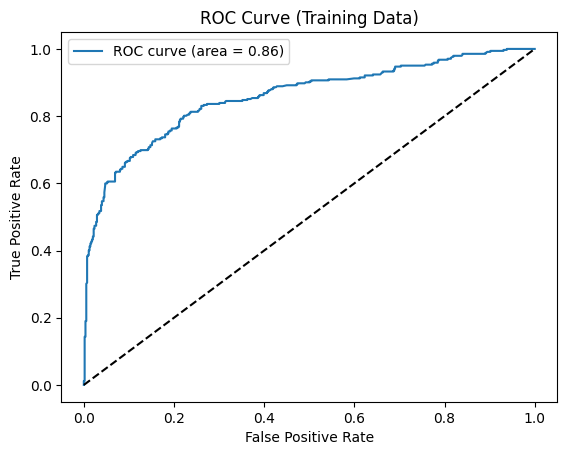

In [46]:
plt.plot(fpr_train, tpr_train, label=f'ROC curve (area = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Training Data)')
plt.legend(loc='best')
plt.show()

## 5. Interpretation:
    a. Interpret the coefficients of the logistic regression model.
    b. Discuss the significance of features in predicting the target variable (survival probability in this case).


In [47]:
# Extract coefficients and map them to their corresponding features
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0],
    'Odds Ratio': np.exp(model.coef_[0])
})

In [48]:
# Sort the features by the magnitude of the coefficients
coefficients.sort_values(by='Odds Ratio', ascending=False, inplace=True)
print(coefficients)

    Feature  Coefficient  Odds Ratio
5      Fare     0.103049    1.108546
4     Parch    -0.075852    0.926953
6  Embarked    -0.169296    0.844259
3     SibSp    -0.352420    0.702985
2       Age    -0.495386    0.609335
0    Pclass    -0.891542    0.410023
1       Sex    -1.293856    0.274211


**Most Significant Features:** Typically, Sex, Pclass, and Age tend to be the most significant predictors of survival.

In [49]:
# Final Output for Test Data
df_test['Survived_Pred'] = y_test_pred
df_test[['PassengerId', 'Survived_Pred']].to_csv('titanic_predictions_test.csv', index=False)
print('Predictions saved to titanic_predictions_test.csv')

Predictions saved to titanic_predictions_test.csv


In [50]:
# Final Output for train Data
df_train['Survived_Pred'] = y_train_pred
df_train[['PassengerId', 'Survived_Pred']].to_csv('titanic_predictions_train.csv', index=False)
print('Predictions saved to titanic_predictions_train.csv')

Predictions saved to titanic_predictions_train.csv


# 6. Deployment with Streamlit:
In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions. 

(optional)For online deployment, use Streamlit Community Cloud, which supports deployment from GitHub repositories. 

Detailed deployment instructions are available in the Streamlit Documentation.
https://docs.streamlit.io/streamlit-community-cloud/deploy-your-app 


In [51]:
# create pickle file
model_filename = 'logistic_regression_model.pkl'
joblib.dump(model, model_filename)
print(f'Model saved to {model_filename}')

Model saved to logistic_regression_model.pkl


In [52]:
# create scalar.pkl
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [53]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_Pred
0,892,3,1,34.5,0,0,7.8292,1,0
1,893,3,0,47.0,1,0,7.0000,2,0
2,894,2,1,62.0,0,0,9.6875,1,0
3,895,3,1,27.0,0,0,8.6625,2,0
4,896,3,0,22.0,1,1,12.2875,2,1


In [54]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_Pred
0,1,0,3,1,22.0,1,0,7.2500,2,0
1,2,1,1,0,38.0,1,0,71.2833,0,1
2,3,1,3,0,26.0,0,0,7.9250,2,1
3,4,1,1,0,35.0,1,0,53.1000,2,1
4,5,0,3,1,35.0,0,0,8.0500,2,0


## Interview Questions:

### 1. What is the difference between precision and recall?


When evaluating a machine learning model, especially in classification tasks, two important metrics are precision and recall. Here's a simple explanation:

1. **Precision**:
   - **Definition**: Precision measures how many of the predicted positive cases are actually positive. It tells us how many of the items labeled as positive by the model are truly positive.
   - **Example**: Suppose a model predicts whether an email is spam. If the model says 10 emails are spam, but only 7 of them are actually spam, the precision is 70%. This means that, out of all the emails the model identified as spam, 70% were correct.
   - **Formula**:
   
        **{Precision} = {True Positives}/{True Positives} + {False Positives}**

2. **Recall**:
   - **Definition**: Recall measures how many of the actual positive cases were correctly identified by the model. It tells us how many of the actual positives were captured by the model.
   - **Example**: Using the spam email example, if there are 10 actual spam emails and the model correctly identifies 7 of them as spam, the recall is 70%. This means that, out of all the real spam emails, the model found 70% of them.
   - **Formula**:

        **{Recall} = {True Positives}/{True Positives} + {False Negatives}**
    

## 2. What is cross-validation, and why is it important in binary classification?

**Cross-validation** is a technique used to assess how well a machine learning model performs on unseen data. It’s crucial for ensuring that the model generalizes well beyond the training dataset. Here’s a simple explanation:

1. **What is Cross-Validation?**
   - **Definition**: Cross-validation involves splitting your dataset into multiple parts, or "folds," and then training and evaluating the model multiple times. Each time, a different fold is used for testing, while the remaining folds are used for training.
   - **Process**:
     1. **Split the Data**: Divide the dataset into ( k ) equal-sized folds (commonly 5 or 10).
     2. **Train and Test**: Train the model using ( k-1 ) folds and test it on the remaining fold.
     3. **Repeat**: Repeat this process ( k ) times, each time using a different fold as the test set.
     4. **Average the Results**: Calculate the average performance metrics across all folds to get a final evaluation.

2. **Why is Cross-Validation Important in Binary Classification?**
   - **Improves Model Reliability**: It ensures that the model performs consistently well across various parts of the dataset.
   - **Reduces Overfitting**: Helps in detecting overfitting by showing how the model generalizes to unseen data.
   - **Provides More Insight**: Offers a more reliable estimate of model performance compared to a single train-test split.
   - **Helps in Hyperparameter Tuning**: Allows for effective tuning of model parameters by providing a better estimate of performance.

Using cross-validation, we can make sure that our model is robust and performs well on different subsets of data, leading to better generalization on unseen data.